<a href="https://colab.research.google.com/github/blackcrowX/Data_Analysis_Projects/blob/main/Python/Analysis_Pokemon_Gen_1-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Analysis - Pokemon Generation 1-8</h1>

<img src="https://static.wikia.nocookie.net/logo-timeline/images/2/21/Pok%C3%A9mon_%28Print%29.svg/revision/latest?cb=20181024043055"/>

<p align="center"><em>Image taken from: https://logo-timeline.fandom.com/wiki/Pok%C3%A9mon/Other</em></p>


## Table of Contents
* Introduction
* Dataset
* Setup
  * Import Libraries
  * Import Data
* Data Cleaning
  * Review Dataframe
  * Review Info
  * Review Missing Values
  * Organise Columns
  * Review Columns
* Data Analysis
  * Type Frequency
  * Strongest and Weakest
* Data Visualisation
  * Generational Distribution
  * Strongest Generation
  * Single Types
  * Dual Types
  * Strongest Types
  * Speed Stat Ratio
  * Columns Correlation
*  Conclusion

<h1 align="center">Introduction</h1>

This data analysis case study will be on a dataset regarding pokemon. It contains data manipulations to try and find answers to questions using visuals of data and statistics. 

Considering how diverse Pokemon are, I was interested in analyzing this datset to learn how the game is balanced and to potentially identify the best Pokemon, if there exists one.



<h1 align="center">Dataset</h1>

The dataset is a listing of all 898 Pokemon species, 1072 including alternate forms, as of 2021. It contains data about their number, name, first and second type, basic statistics, total statistics,  generation, and legendary status. The dataset was published by <a href="https://data.world/data-society/pokemon-with-stats">data.world</a>.

<h1 align="center">Setup</h1>

## Step 1: Import Libraries

Import and configure libraries required for data analysis.

In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "darkgrid")

## Step 2: Import Dataset
Import dataset as variable `df` into Python.

In [ ]:
url = "https://raw.githubusercontent.com/blackcrowX/Data-Analysis-Projects/main/Datasets/pokemon_gen_1-8.csv"
df = pd.read_csv(url)

<h1 align="center">Data Cleaning</h1>

## Step 3: Review Dataframe

To start the process of data cleaning we'll read the first five rows of the dataframe.

In [ ]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


Now we'll read the last five rows of the dataframe.

In [ ]:
df.tail()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True
1071,898,Shadow Rider Calyrex,Psychic,Ghost,680,100,85,80,165,100,150,8,True


After thebrief overview of the dataframe we can say that there seem to be missing values (`NaN`) and the entries have a unique name instead of number value. 

## Step 4: Review Info
Let's check the info of the dataframe for the `Dtype` of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


The basic insight here is that the dataframe has 13 columns of which nine are of type integer, three are of type object and one is of type boolean. The amount of rows matches the amount of pokemon species including alternate forms. The column types match their respective value.

## Step 5: Review Missing Values
Check for `Null` or `NaN` values to avoid errors and potential bias later on.


In [ ]:
df.isnull().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

Since all Pokemon species have a primary type but not necessarily a secondary type, we'll fill in these missing values with a placeholder.

In [ ]:
df["type2"].fillna(value="None", inplace=True)

With all the missing values filled and no further missing values in the dataframe we check on the columns.

## Step 6: Organize Columns

Let'S first rename columns `type1` into `primary_type` and `type2` into `secondary_type`.

In [ ]:
df.rename(columns = {"type1":"primary_type", "type2":"secondary_type"}, inplace = True)

Check columns in the dataframe.

In [ ]:
df.columns

Index(['number', 'name', 'primary_type', 'secondary_type', 'total', 'hp',
       'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation',
       'legendary'],
      dtype='object')

With this we have clerly defined what the columns `type1`and `type2` are.

## Step 7: Review Columns

Let'S review the columns of the dataframe.

In [ ]:
print("Pokemon Names:", len(df["name"].unique()))
print("Pokedex Numbers:", len(df["number"].unique()))
print("Primary Types:", len(df["primary_type"].unique()))
print("Secondary Types:", len(df["secondary_type"].unique()))
print("Generations:", len(df["generation"].unique()))

Pokemon Names: 1072
Pokedex Numbers: 898
Primary Types: 20
Secondary Types: 19
Generations: 9


In [ ]:
print("Total Stats:", min(df["total"].unique()), "-", max(df["total"]))
print("HP Stats:", min(df["hp"].unique()), "-", max(df["hp"]))
print("Attack Stats:", min(df["attack"].unique()), "-", max(df["attack"]))
print("Defense Stats:", min(df["defense"].unique()), "-", max(df["defense"]))
print("Special Attack Stats:", min(df["sp_attack"].unique()), "-", max(df["sp_attack"]))
print("Special Defense Stats:", min(df["sp_defense"].unique()), "-", max(df["sp_defense"]))
print("Speed Stats:", min(df["speed"].unique()), "-", max(df["speed"]))

Total Stats: 175 - 1125
HP Stats: 1 - 255
Attack Stats: 5 - 190
Defense Stats: 5 - 250
Special Attack Stats: 10 - 194
Special Defense Stats: 20 - 250
Speed Stats: 5 - 200


The unique length of the columns `name`, `number` and `legendary` are fine. The stats also appear to have a sensible range. But we have to further look into why the amount of primary types is higher than the amount of secondary types and why we have nine diffrent values for eight existing generations of pokemon.

In [ ]:
print("Primary Type:",df["primary_type"].unique())
print("Secondary Type:",df["secondary_type"].unique())
print("Generations:",df["generation"].unique())

Primary Type: ['Grass' 'Fire' 'Water' 'Blastoise' 'Bug' 'Normal' 'Dark' 'Poison'
 'Electric' 'Ground' 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock'
 'Ghost' 'Dragon' 'Flying' 'Graass']
Secondary Type: ['Poison' 'None' 'Flying' 'Dragon' 'Water' 'Normal' 'Psychic' 'Steel'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost'
 'Rock' 'Fire' 'Bug']
Generations: [1 7 8 2 3 4 5 6 0]


Know we know that there are two incorrect value for the `primary_type` with `Blastoise` and `Graass` and one incorrect value for the `generation`  with `0`.
We will have to replace these values with their correct value.

For value `0`:

In [ ]:
df.loc[df["generation"] == 0]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
950,808,Meltan,Steel,None,300,46,65,65,55,35,34,0,True
951,809,Melmetal,Steel,None,600,135,143,143,80,65,34,0,True
952,809,Gigantamax Melmetal,Steel,None,600,135,143,143,80,65,34,0,True


In [ ]:
df.generation = df.generation.replace(0, 7)

For value `"Graass"`:

In [ ]:
df.loc[df["primary_type"] == "Graass"]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
978,830,Eldegoss,Graass,None,460,60,50,90,80,120,60,8,False


In [ ]:
df.primary_type = df.primary_type.str.replace("Graass", "Grass")

For value `"Blastoise"`:

In [ ]:
df.loc[df["primary_type"] == "Blastoise"]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blasoise,Blastoise,Water,530,79,83,100,85,105,78,1,False


In [ ]:
df.loc[15,["primary_type","secondary_type"]] = ["Water", "None"]

Check if the changes have been updated correctly.

In [ ]:
print("Pokemon Names:", len(df["name"].unique()))
print("Pokedex Numbers:", len(df["number"].unique()))
print("Primary Types:", len(df["primary_type"].unique()))
print("Secondary Types:", len(df["secondary_type"].unique()))
print("Generations:", len(df["generation"].unique()))
print("Legendary:", len(df["legendary"].unique()))

Pokemon Names: 1072
Pokedex Numbers: 898
Primary Types: 18
Secondary Types: 19
Generations: 8
Legendary: 2


Now we have sucessfully cleaned the dataframe and can continue with Data Analysis.

<h1 align="center">Data Analysis</h1>

## Step 8: Type Frequency

Now, after seeing what the unique types are let's find out what how many Pokemon have each type.

In [ ]:
print(df["primary_type"].value_counts())


Water       137
Normal      117
Grass        95
Bug          83
Psychic      80
Fire         67
Electric     63
Rock         60
Dark         48
Fighting     45
Ghost        43
Poison       42
Ground       42
Dragon       41
Steel        39
Ice          38
Fairy        23
Flying        9
Name: primary_type, dtype: int64


In [ ]:
print(df["secondary_type"].value_counts())

None        499
Flying      114
Fairy        44
Psychic      43
Poison       41
Ground       39
Steel        36
Dragon       35
Fighting     32
Grass        29
Dark         28
Ghost        26
Water        21
Ice          19
Fire         18
Rock         16
Normal       11
Electric     11
Bug          10
Name: secondary_type, dtype: int64


We can conclude that the highest frequency for the primary type belongs to `"Water"` and for the secondary type `"None"`. On the other hand, the lowest frequency for the primary type belongs to `"Flying"` and for the secondary type `"Bug"`. 

## Step 9: Strongest and Weakest

Let's find out which Pokemon are the strongest.

In [ ]:
strongest = df.sort_values(by="total", ascending=False)
strongest.head(10)

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1057,890,Eternamax Eternatus,Poison,Dragon,1125,255,115,250,125,250,130,8,True
204,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
471,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
205,150,Mega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True
467,382,Primal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
469,383,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
942,800,Ultra Necrozma,Psychic,Dragon,754,97,167,97,167,97,129,7,True
597,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True
1053,888,Zacian Crowned Sword Forme,Fairy,Steel,720,92,170,115,80,115,148,8,True
1055,889,Zamazenta Crowned Sheild Forme,Fighting,Steel,720,92,130,145,80,145,128,8,True


Let's find out which Pokemon are the weakest.

In [ ]:
weakest = df.sort_values(by="total")
weakest.head(10)

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
883,746,Wishiwashi Solo Forme,Water,None,175,45,20,20,25,25,40,7,False
247,191,Sunkern,Grass,None,180,30,30,30,30,30,30,2,False
971,824,Blipbug,Bug,None,180,25,20,20,25,45,45,8,False
1031,872,Snom,Ice,Bug,185,30,25,35,45,30,20,8,False
367,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
491,401,Kricketot,Bug,None,194,37,25,41,25,41,25,4,False
333,265,Wurmple,Bug,None,195,45,45,35,20,30,20,3,False
20,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
16,10,Caterpie,Bug,None,195,45,30,35,20,20,45,1,False
348,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False


So know we know that Eternamax Eernatus is the srongest pokemon in the game and that there is a threeway tie for weakest pokemon with the solo form of Wishiwashi, Sunkern and Blipbug.

<h1 align="center">Data Visualisation</h1>

## Step 10: Generational Distribution

Let's find out how the number of Pokemon are distributed over the generations.


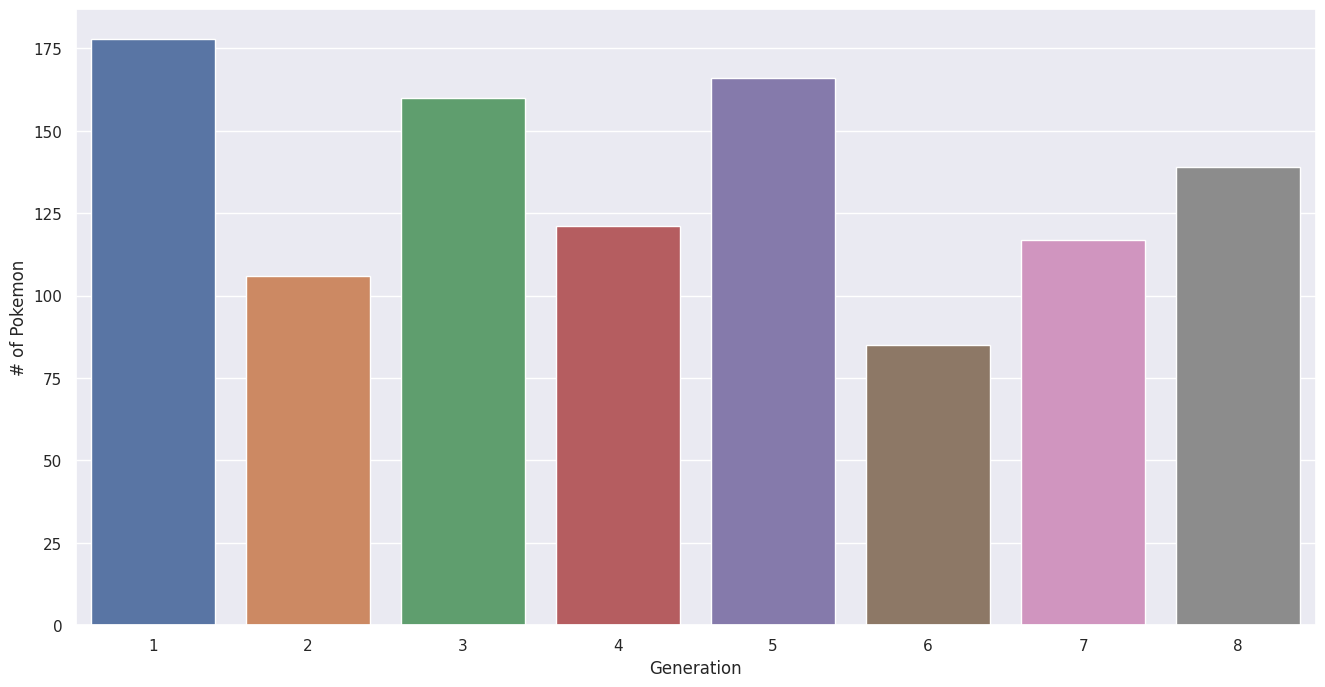

In [ ]:
f, ax = plt.subplots(1,1, figsize = (16,8))
ax = sns.countplot(
          x = df["generation"],
          data= df
          ).set(xlabel ="Generation", ylabel = "# of Pokemon")

The most pokemon come from the first generation and there doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

## Step 11: Strongest Generation

Let's find out which generation is the strongest.

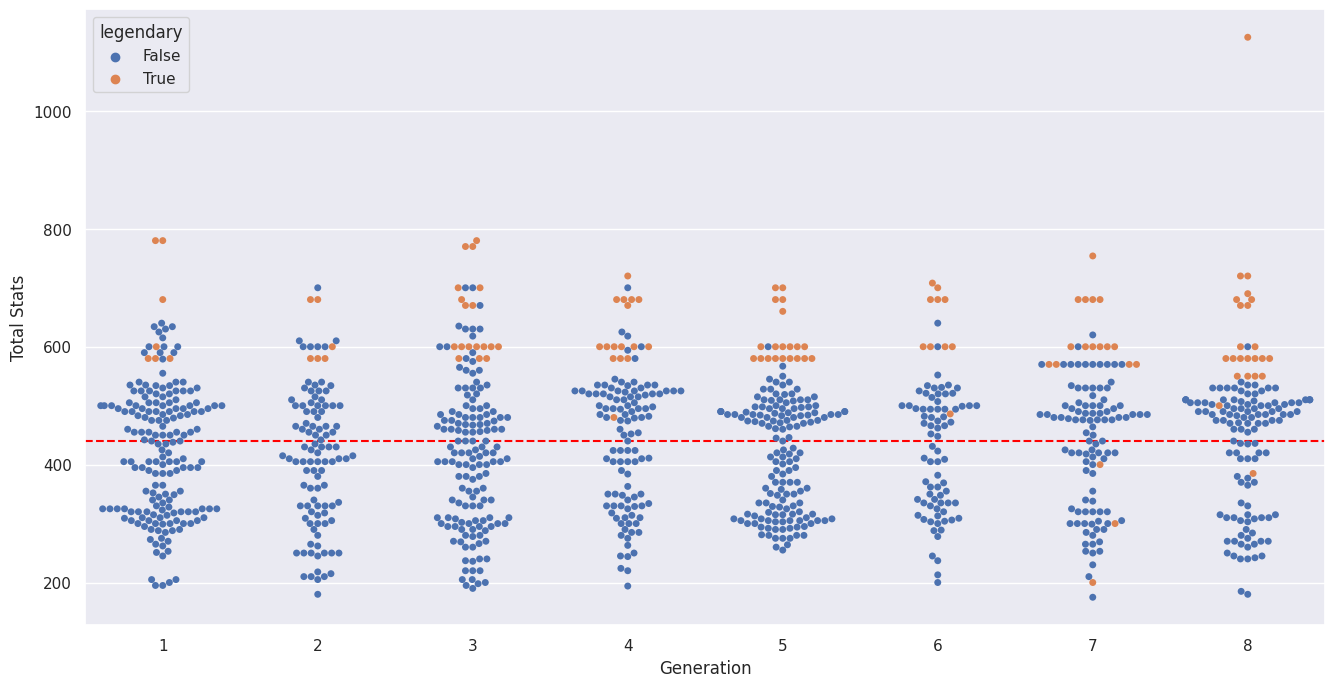

In [ ]:
f, ax = plt.subplots(1,1, figsize = (16,8))
ax = sns.swarmplot(
        data = df, 
        x = "generation",
        y= "total",
        hue = "legendary"
        ).set(xlabel ="Generation", ylabel = "Total Stats")
plt.axhline(df["total"].mean(), color = "red", linestyle = "dashed") 

The newest Generation seems to be the strongest, but the difference is marginally and mainly due to outliers.

## Step 12: Single Types

Let's investigate the distribution of the single type Pokemon.

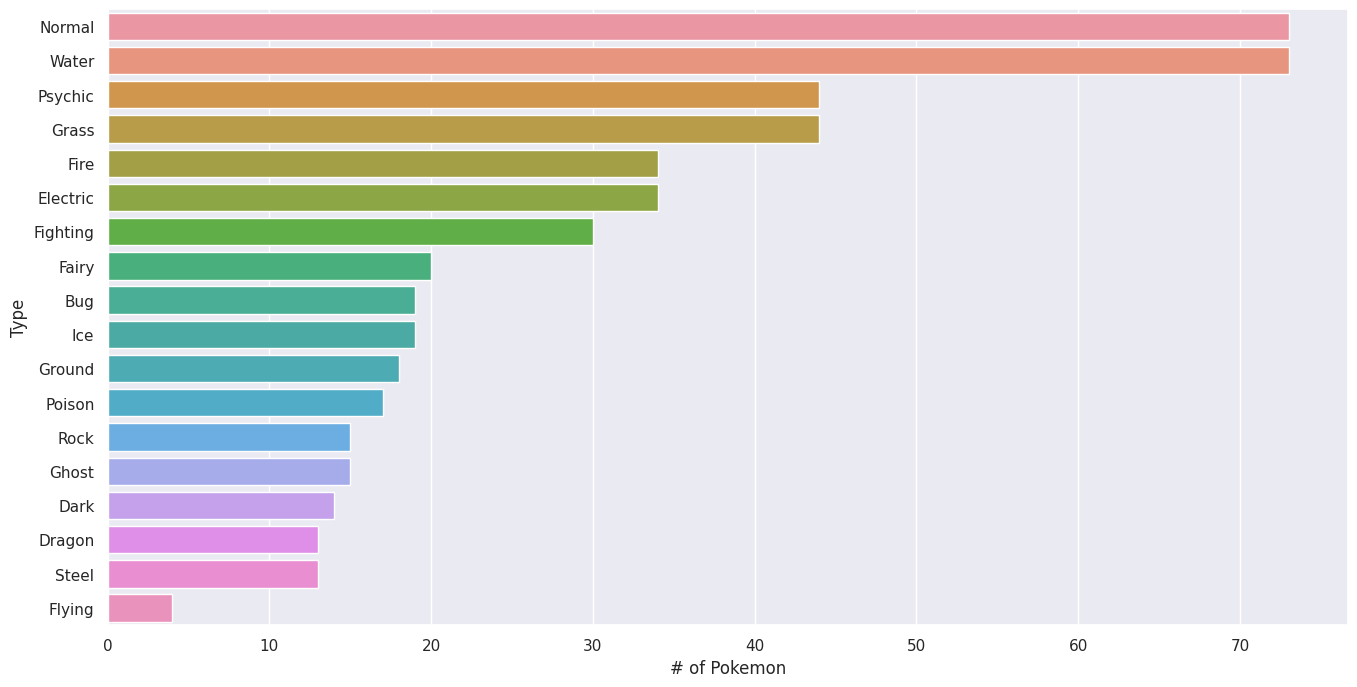

In [ ]:
single_types = df[df["secondary_type"] == "None"]

f, ax = plt.subplots(1,1, figsize = (16,8))
ax = sns.countplot(
        y="primary_type", 
        data=single_types,
        order=single_types["primary_type"].value_counts().index,
        ).set(xlabel ="# of Pokemon", ylabel = "Type");

This plot reveals that the most common single typred pokemon have either the water or normal type.

## Step 13: Dual Types
Let's plot a chart for the various combinations of primary and secondary types of Pokemon.

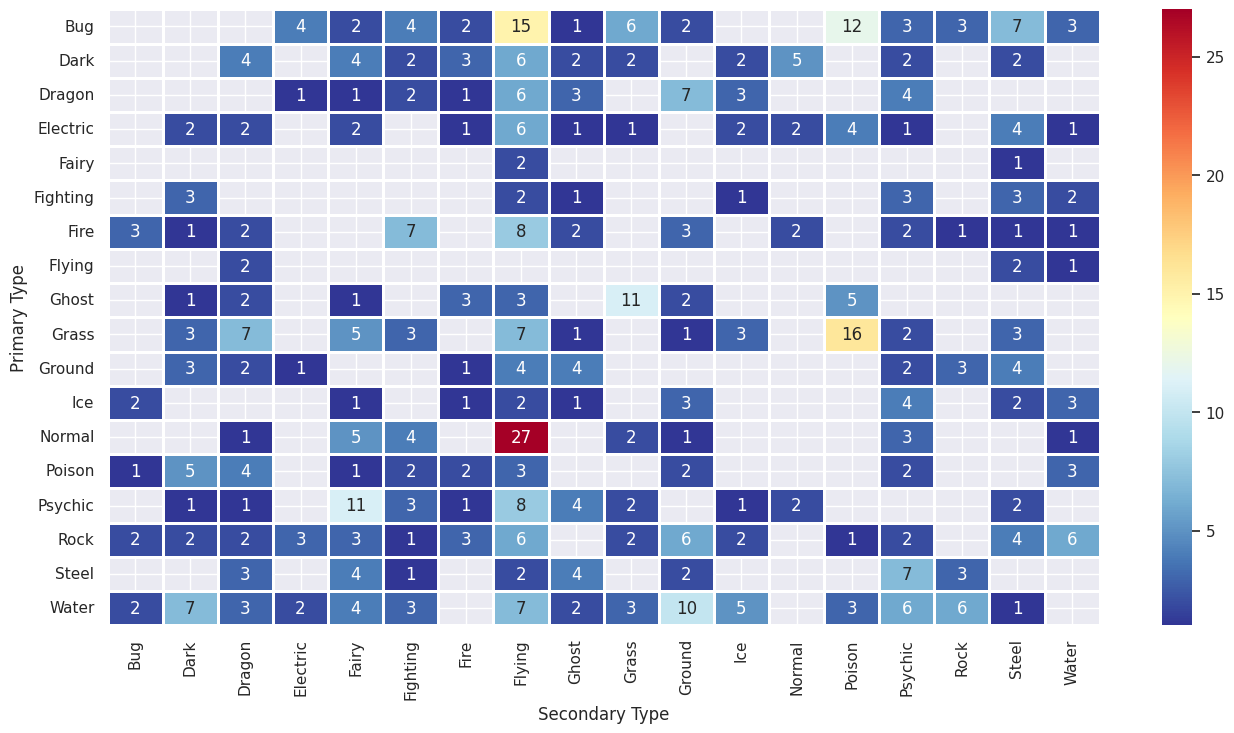

In [ ]:
dual_types = df[df["secondary_type"] != "None"]

f, ax = plt.subplots(1,1, figsize = (16,8))
ax = sns.heatmap(
          dual_types.groupby(["primary_type", "secondary_type"]).size().unstack(),
          linewidths = 1,
          annot = True,
          cmap = "RdYlBu_r"
          ).set(xlabel ="Secondary Type", ylabel = "Primary Type")

This plot reveals that five most common combinations of primary and secondary type are in order:

1. Normal/Flying-type
2. Bug/Flying-type
3. Grass/Poison-type

## Step 14: Strongest Type 

Let's find out what the strongest type combination is.

<ipython-input-28-0137fe67c5f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = df.groupby(['primary_type', 'secondary_type']).median().loc[:, 'total']


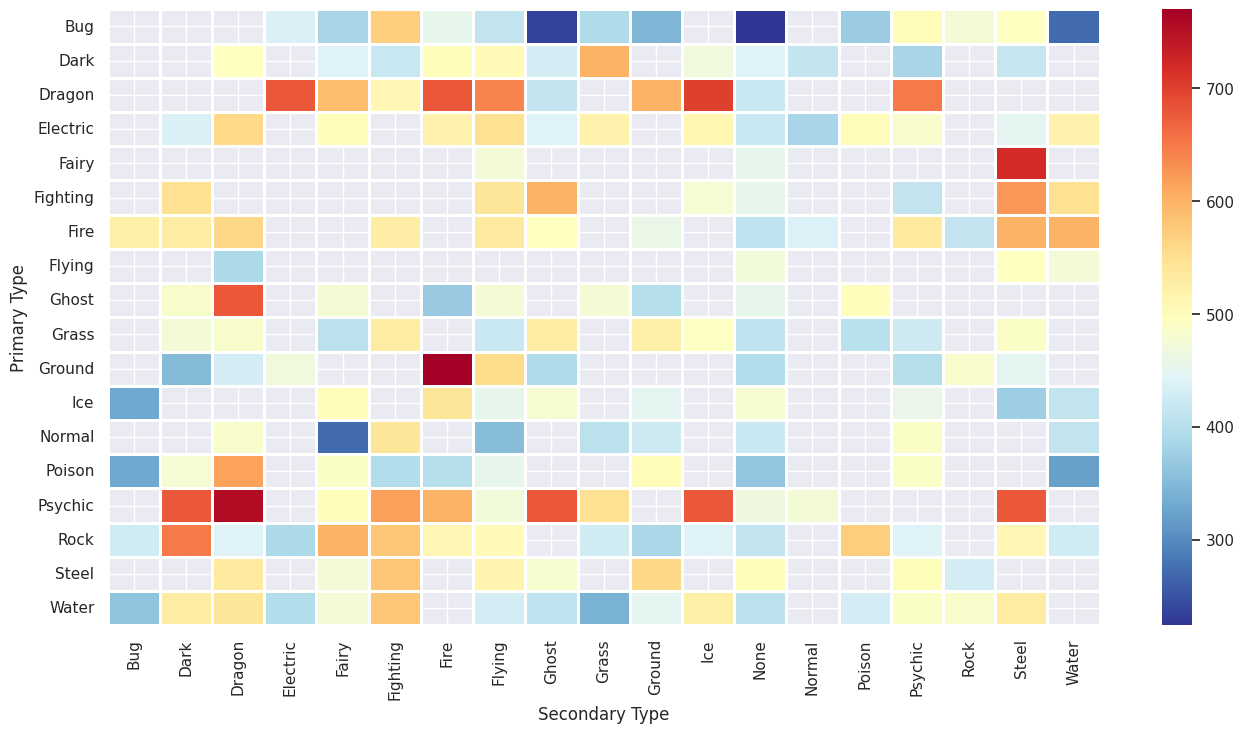

In [ ]:
medians = df.groupby(['primary_type', 'secondary_type']).median().loc[:, 'total']

f, ax = plt.subplots(1,1, figsize = (16,8))
ax = sns.heatmap(
      medians.unstack(),
      linewidths=1,
      cmap='RdYlBu_r'
      ).set(xlabel ="Secondary Type", ylabel = "Primary Type")

We can see that the strongest type combination by total stats is ground/ fire followed by psychic/ dragon.

## Step 15: Speed Stat Ratio

Let's plot the ratio between `primary type` and `speed`.

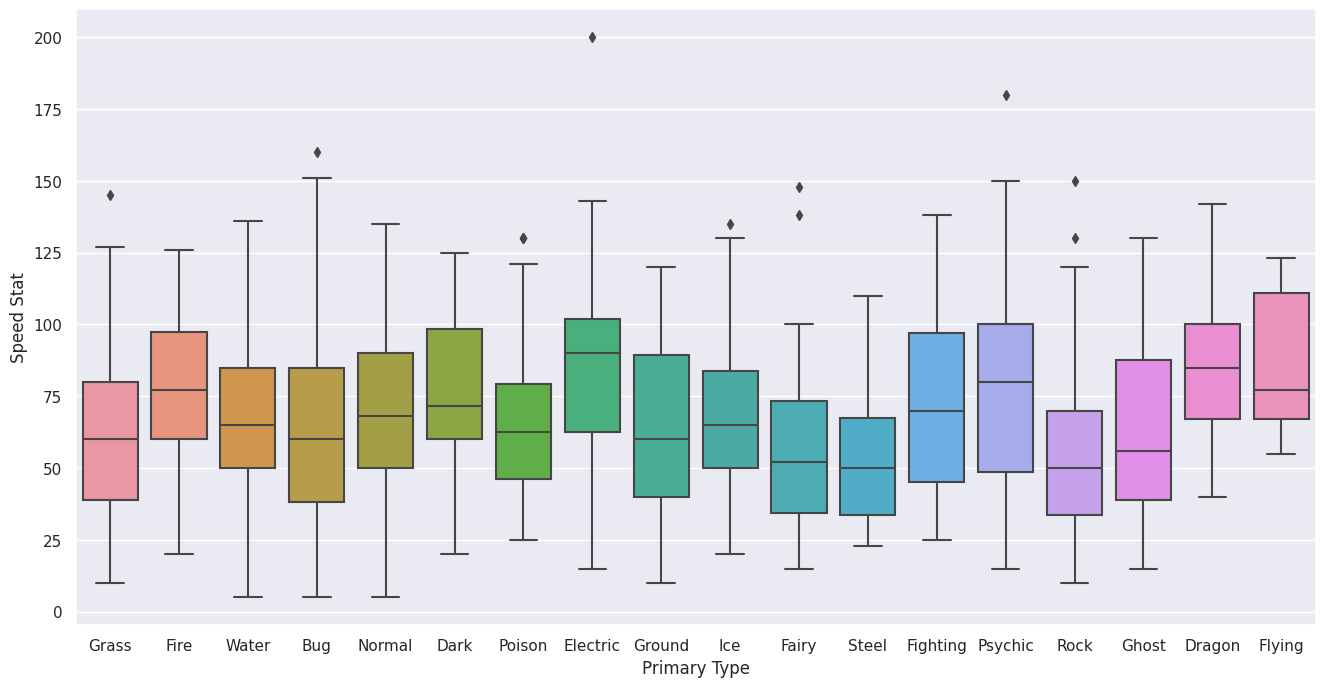

In [ ]:
f, ax = plt.subplots(1,1, figsize = (16,8))
ax = sns.boxplot(
            data = df,
            x = "primary_type", 
            y = "speed"
            ).set(xlabel ="Primary Type", ylabel = "Speed Stat")

Let's also plot the ratio between `secondary_type`and `speed`.

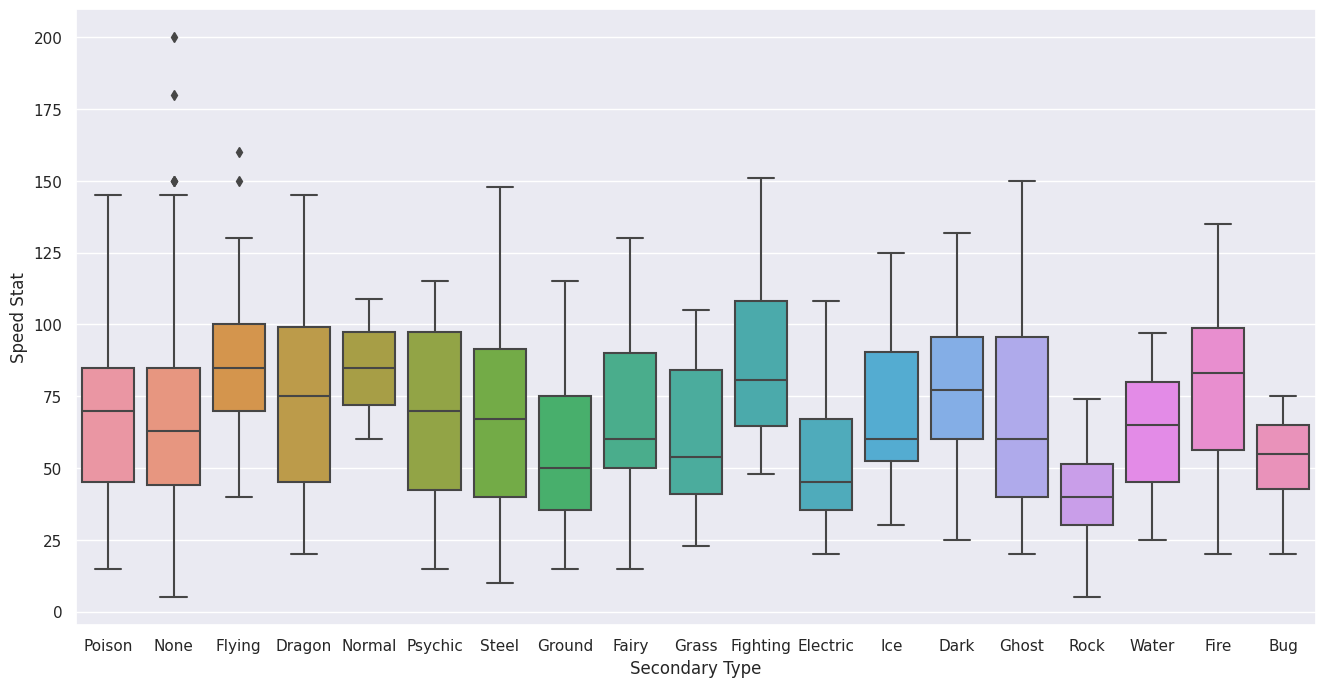

In [ ]:
f, ax = plt.subplots(1,1, figsize = (16,8))
ax = sns.boxplot(
            data = df,
            x = "secondary_type", 
            y = "speed"
            ).set(xlabel ="Secondary Type", ylabel = "Speed Stat")

We can see that the quickest pokemon has the typing `electric`and `none`. Furthermore it is clear that there is no "fastest type".

## Step 16: Columns Correlation

Let's find out the correlation between each column in the dataframe.

<ipython-input-31-a6e898d155fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlBu_r')


<Axes: >

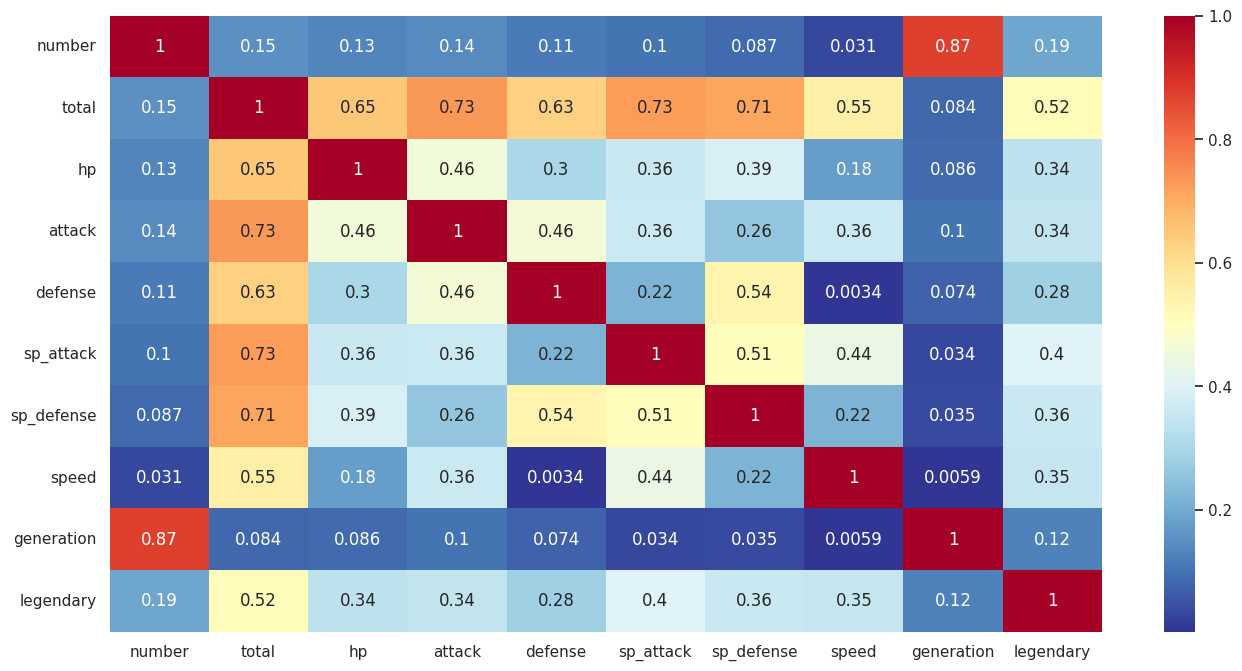

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu_r')

We can see that the highest correlation is between the `number` and `generation` column with 0.87 followed by `attack` and `sp_attack` in correlation with `total` with 0.73.

<h1 align="center">Conclusion</h1>

After this exploratory data analysis it is clear that the most common types of Pokemon are wate followed by normal. The most common single type is water and the most common dual type is normal/ flying. The strongest type combination by total stats is ground/ fire. Furthermore the stngest pokemon is Eternamax Eternatus and there is a threeway-tie for weakest pokemon. The most common generation is the first generation, while the strongest generation is the eight generation by a minor margin. The last finding is that the quickest pokemon is of sindle type electric, while there is no definitive fastest type of pokemon.
The highest correlation in the values is obviously between the numbers and generations with 0.87.